In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
from linearmodels import PanelOLS

In [3]:
df = pd.read_csv('premierandmajorwithbd.csv', encoding = "ISO-8859-1")

In [4]:
df = df[df['endelo32'].notnull()]

In [5]:
len(df)

5405

In [6]:
df.head()

,country,name,dob,team,player,tour,start,end,startelo32,startelo64,endelo32,endelo64
1,Israel,Neta Shapira,1997-04-17,Prodota Gaming,33,World Cyber Arena 2016,2016-12-14,2016-12-16,985.437192,1013.682296,975.126721,996.986521
2,Israel,Neta Shapira,1997-04-17,Prodota Gaming,33,Mr. Cat Invitational Europe,2017-05-02,2017-05-18,931.509695,904.578438,956.378117,939.977343
3,Russia,Stanislav Glushan,1992-11-09,Virtus.pro,BzzIsPerfect,XMG Captains Draft 2.0,2014-10-31,2014-12-21,1175.861480,1293.292570,1177.190553,1282.803243
4,Russia,Stanislav Glushan,1992-11-09,Virtus.pro,BzzIsPerfect,ASUS ROG DreamLeague Season 2,2014-10-06,2014-11-29,1084.218961,1144.221733,1154.874539,1229.010006
5,Russia,Stanislav Glushan,1992-11-09,Virtus.Pro,BzzIsPerfect,StarLadder StarSeries Season 10,2014-08-15,2014-10-26,1047.797971,1107.301877,1098.584877,1142.274107


In [7]:
df['dob'] = pd.to_datetime(df['dob'], format="%Y-%m-%d")

In [8]:
df['start'] = pd.to_datetime(df['start'], format="%Y-%m-%d")
df['end'] = pd.to_datetime(df['end'], format="%Y-%m-%d")

In [9]:
df['ageattour'] = df['start'] - df['dob']

In [10]:
df['elo32diff'] = df['endelo32'] - df['startelo32']

In [11]:
df[['elo32diff', 'ageattour']]

,elo32diff,ageattour
1,-10.310471,7181 days
2,24.868422,7320 days
3,1.329072,8026 days
4,70.655578,8001 days
5,50.786906,7949 days
6,-41.757494,8027 days
7,-0.968476,7959 days
8,-57.046261,8290 days
9,-0.007901,8440 days
10,-179.454467,8356 days


In [12]:
df.dtypes

country                object
name                   object
dob            datetime64[ns]
team                   object
player                 object
tour                   object
start          datetime64[ns]
end            datetime64[ns]
startelo32            float64
startelo64            float64
endelo32              float64
endelo64              float64
ageattour     timedelta64[ns]
elo32diff             float64
dtype: object

In [13]:
df['ageattour'] = (df['ageattour'] / np.timedelta64(1, 'D')).astype(int)

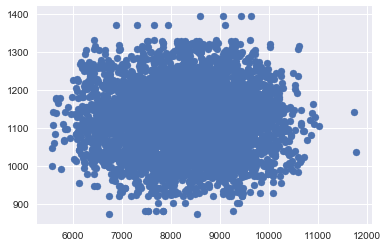

In [14]:
y = df['startelo32']
x = df['ageattour']
plt.scatter(x, y)

In [15]:
df.describe()

,startelo32,startelo64,endelo32,endelo64,ageattour,elo32diff
count,5405.000000,5405.000000,5405.000000,5405.000000,5405.000000,5405.000000
mean,1119.908347,1178.323276,1122.887610,1181.097056,8284.463460,2.979262
std,84.173111,122.988212,89.901553,133.626400,947.942201,63.710230
min,874.387622,807.504689,843.921781,785.675617,5569.000000,-281.807444
25%,1061.157283,1091.442804,1061.283690,1091.760496,7631.000000,-32.395005
50%,1119.926725,1178.717757,1121.152763,1178.242177,8304.000000,-1.241774
75%,1172.604972,1257.778932,1182.874971,1271.058372,8948.000000,37.031150
max,1393.485812,1558.429280,1382.320183,1554.769362,11773.000000,233.169112


In [16]:
df.groupby('player').size().where(lambda x : x!=1).sort_values().dropna()

player
33                 2.0
Lubby              2.0
BYB                2.0
EL lisasH          2.0
SeleCT             2.0
Benhur             2.0
Mini               2.0
Sugar baby         2.0
Sunlight           2.0
Mool               2.0
RmN-               2.0
Joraal             2.0
JUST               2.0
Tudi               2.0
Nisha              2.0
HANNAH MONTANA     2.0
Waixi              2.0
Wejustzik          2.0
Fonte              2.0
Godot              2.0
Pablo              2.0
MaNia              2.0
ComeWithMe         3.0
ZeroPerfect        3.0
Link               3.0
CanceL^^           3.0
LeBronDota         3.0
Fata               3.0
Jenkins            3.0
Flysolo            3.0
                  ... 
Black^            46.0
Ferrari 430       47.0
Fng               47.0
EGM               49.0
Aui 2000          51.0
Kaka              52.0
G                 53.0
XBOCT             53.0
Resolut1on        54.0
Funn1k            55.0
Yao               55.0
BurNIng           55.0
Fear

In [17]:
len(df.groupby('player').size().where(lambda x : x!=1).sort_values().dropna())

265

In [18]:
df.head()

,country,name,dob,team,player,tour,start,end,startelo32,startelo64,endelo32,endelo64,ageattour,elo32diff
1,Israel,Neta Shapira,1997-04-17,Prodota Gaming,33,World Cyber Arena 2016,2016-12-14,2016-12-16,985.437192,1013.682296,975.126721,996.986521,7181,-10.310471
2,Israel,Neta Shapira,1997-04-17,Prodota Gaming,33,Mr. Cat Invitational Europe,2017-05-02,2017-05-18,931.509695,904.578438,956.378117,939.977343,7320,24.868422
3,Russia,Stanislav Glushan,1992-11-09,Virtus.pro,BzzIsPerfect,XMG Captains Draft 2.0,2014-10-31,2014-12-21,1175.861480,1293.292570,1177.190553,1282.803243,8026,1.329072
4,Russia,Stanislav Glushan,1992-11-09,Virtus.pro,BzzIsPerfect,ASUS ROG DreamLeague Season 2,2014-10-06,2014-11-29,1084.218961,1144.221733,1154.874539,1229.010006,8001,70.655578
5,Russia,Stanislav Glushan,1992-11-09,Virtus.Pro,BzzIsPerfect,StarLadder StarSeries Season 10,2014-08-15,2014-10-26,1047.797971,1107.301877,1098.584877,1142.274107,7949,50.786906


In [19]:
cumsums = df[['player', 'start', 'elo32diff']].groupby(['player', 'start']).sum().groupby(level=0).cumsum()

In [20]:
df2 = df.set_index(['player', 'start'])

In [21]:
df2['cumelo'] = cumsums

In [22]:
df2 = df2.reset_index()

In [23]:
df2.head()

,player,start,country,name,dob,team,tour,end,startelo32,startelo64,endelo32,endelo64,ageattour,elo32diff,cumelo
0,33,2016-12-14,Israel,Neta Shapira,1997-04-17,Prodota Gaming,World Cyber Arena 2016,2016-12-16,985.437192,1013.682296,975.126721,996.986521,7181,-10.310471,-10.310471
1,33,2017-05-02,Israel,Neta Shapira,1997-04-17,Prodota Gaming,Mr. Cat Invitational Europe,2017-05-18,931.509695,904.578438,956.378117,939.977343,7320,24.868422,14.557951
2,BzzIsPerfect,2014-10-31,Russia,Stanislav Glushan,1992-11-09,Virtus.pro,XMG Captains Draft 2.0,2014-12-21,1175.861480,1293.292570,1177.190553,1282.803243,8026,1.329072,121.803080
3,BzzIsPerfect,2014-10-06,Russia,Stanislav Glushan,1992-11-09,Virtus.pro,ASUS ROG DreamLeague Season 2,2014-11-29,1084.218961,1144.221733,1154.874539,1229.010006,8001,70.655578,120.474008
4,BzzIsPerfect,2014-08-15,Russia,Stanislav Glushan,1992-11-09,Virtus.Pro,StarLadder StarSeries Season 10,2014-10-26,1047.797971,1107.301877,1098.584877,1142.274107,7949,50.786906,50.786906


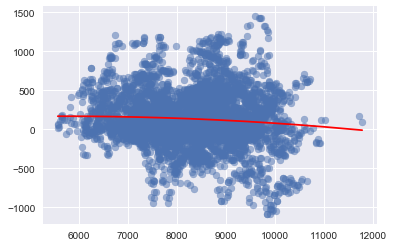

In [24]:
x = df2['ageattour']
y = df2['cumelo']
plt.scatter(x, y, alpha = 0.5)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 2))(np.unique(x)), 'r')

In [25]:
df2['intage'] = df2['ageattour'] // 365

In [26]:
df2[['player', 'elo32diff', 'start']].groupby(['player', 'start']).sum()

elo32diff
player      start                 
33          2016-12-14  -10.310471
            2017-05-02   24.868422
7ckngMad    2013-08-31   77.849345
            2013-11-25  -27.438496
            2014-01-04   -9.701371
            2014-01-31  -33.776971
            2014-02-09   11.617397
            2014-02-18   53.128873
            2014-03-03   -3.076516
            2014-11-09   -2.145656
            2015-01-21  -57.046261
            2015-03-09   90.511606
            2015-03-28 -179.454467
            2015-04-06  -74.398116
            2015-04-20  -73.376509
            2015-05-03    0.000000
            2015-06-20   -0.007901
9pasha      2016-11-16   43.393392
            2016-12-03  -46.032666
            2017-01-20  -38.397529
            2017-04-01  -27.542613
            2017-04-24   48.068231
            2017-05-02  -42.707786
            2017-05-04  -62.127595
            2017-06-04  -12.369686
            2017-06-14   52.847107
            2017-08-02   -3.356647
            2017-10-26   46.508624
            2017-11-02  -77.406616
            2017-11-21   -1.123005
...                            ...
Zai         2015-07-27  -68.925157
            2016-07-21  -26.034801
            2016-08-02  126.010672
            2016-09-28   26.086308
            2016-11-10  -54.133036
            2016-11-16   10.824913
            2016-12-03    6.704597
            2016-12-17   -1.152361
            2017-01-20   69.980804
            2017-03-27   27.702377
            2017-04-24   27.234342
            2017-05-25   28.821655
            2017-06-04   52.548577
            2017-07-05  -33.269006
            2017-08-02   -4.250207
            2017-12-07   -1.252139
            2017-12-13    6.591456
Zayac       2017-11-19   52.084252
ZeroPerfect 2015-04-11 -122.294478
            2015-04-14 -108.003354
            2015-05-07  -79.515757
Zhou        2012-10-22  -80.110073
            2012-11-29   -1.389716
            2012-12-24   28.573714
            2013-03-16   -8.938572
            2013-05-10   20.019363
            2013-06-16   83.190651
            2013-07-10  -39.133836
            2013-08-02   69.873458
Ztok        2015-11-13    2.124316

[5351 rows x 1 columns]

In [27]:
df[df['player'] == '7ckngMad']

,country,name,dob,team,player,tour,start,end,startelo32,startelo64,endelo32,endelo64,ageattour,elo32diff
8,France,Sébastien Debs,1992-05-11,Alliance,7ckngMad,Dota Pit League Season 3,2015-01-21,2015-07-12,1058.036627,1125.153101,1000.990366,1005.816375,8290,-57.046261
9,France,Sébastien Debs,1992-05-11,Alliance,7ckngMad,ESL One Frankfurt 2015,2015-06-20,2015-06-21,1001.152226,1006.766974,1001.144326,1006.720572,8440,-0.007901
10,France,Sébastien Debs,1992-05-11,Alliance,7ckngMad,ASUS ROG DreamLeague Season 3,2015-03-28,2015-06-15,1214.790685,1337.503315,1035.336217,1049.240496,8356,-179.454467
11,France,Sébastien Debs,1992-05-11,Alliance,7ckngMad,joinDOTA MLG Pro League Season 2,2015-04-20,2015-06-07,1146.380583,1169.026672,1073.004074,1093.245121,8379,-73.376509
12,France,Sébastien Debs,1992-05-11,Alliance,7ckngMad,i-League Season 3,2015-04-06,2015-05-23,1211.732218,1284.654934,1137.334101,1158.619436,8365,-74.398116
13,France,Sébastien Debs,1992-05-11,Alliance,7ckngMad,StarLadder StarSeries Season 12,2015-03-09,2015-04-26,1043.379125,1107.583617,1133.890731,1187.452946,8337,90.511606
14,France,Sébastien Debs,1992-05-11,Sigma.int,7ckngMad,ASUS ROG DreamLeague Season 1,2014-03-03,2014-06-16,1055.128008,1097.988962,1052.051493,1094.669730,7966,-3.076516
15,France,Sébastien Debs,1992-05-11,Sigma.int,7ckngMad,Dota 2 Champions League Season 2,2014-02-09,2014-04-15,1068.128131,1075.634673,1079.745527,1145.038829,7944,11.617397
16,France,Sébastien Debs,1992-05-11,Sigma.int,7ckngMad,StarLadder StarSeries Season 8,2013-11-25,2014-01-19,1166.864105,1247.678278,1139.425609,1190.560523,7868,-27.438496
17,France,Sébastien Debs,1992-05-11,Quantic Gaming,7ckngMad,StarLadder StarSeries Season 7,2013-08-31,2013-10-13,1023.846548,1022.550958,1101.695893,1185.831192,7782,77.849345


In [28]:
df3 = df2[['intage', 'cumelo']]

In [29]:
df3.groupby('intage').size()

intage
15     16
16     48
17    150
18    230
19    378
20    606
21    734
22    727
23    802
24    680
25    483
26    282
27    188
28     60
29     18
30      1
32      2
dtype: int64

In [30]:
df4 = df3.groupby('intage').mean()
df4

,cumelo
intage,
15,120.233119
16,164.414882
17,236.521708
18,230.818999
19,174.328037
20,138.552908
21,44.696226
22,80.185713
23,194.149987


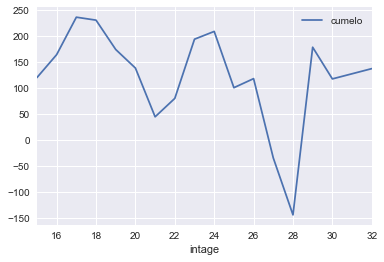

In [31]:
df4.plot()

In [32]:
df4 = df4.reset_index()
df4.head()

,intage,cumelo
0,15,120.233119
1,16,164.414882
2,17,236.521708
3,18,230.818999
4,19,174.328037


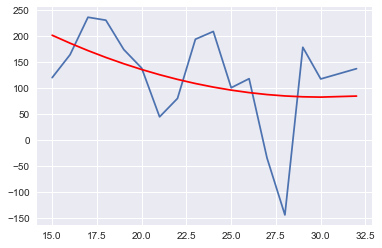

In [33]:
x = df4['intage']
y = df4['cumelo']
plt.plot(x, y)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 2))(np.unique(x)), 'r')

In [34]:
df2.head()

,player,start,country,name,dob,team,tour,end,startelo32,startelo64,endelo32,endelo64,ageattour,elo32diff,cumelo,intage
0,33,2016-12-14,Israel,Neta Shapira,1997-04-17,Prodota Gaming,World Cyber Arena 2016,2016-12-16,985.437192,1013.682296,975.126721,996.986521,7181,-10.310471,-10.310471,19
1,33,2017-05-02,Israel,Neta Shapira,1997-04-17,Prodota Gaming,Mr. Cat Invitational Europe,2017-05-18,931.509695,904.578438,956.378117,939.977343,7320,24.868422,14.557951,20
2,BzzIsPerfect,2014-10-31,Russia,Stanislav Glushan,1992-11-09,Virtus.pro,XMG Captains Draft 2.0,2014-12-21,1175.861480,1293.292570,1177.190553,1282.803243,8026,1.329072,121.803080,21
3,BzzIsPerfect,2014-10-06,Russia,Stanislav Glushan,1992-11-09,Virtus.pro,ASUS ROG DreamLeague Season 2,2014-11-29,1084.218961,1144.221733,1154.874539,1229.010006,8001,70.655578,120.474008,21
4,BzzIsPerfect,2014-08-15,Russia,Stanislav Glushan,1992-11-09,Virtus.Pro,StarLadder StarSeries Season 10,2014-10-26,1047.797971,1107.301877,1098.584877,1142.274107,7949,50.786906,50.786906,21


In [35]:
df3[df3['intage'] <= 18]

,intage,cumelo
57,17,-5.601408
58,17,-4.024980
59,16,50.599493
60,16,46.269797
61,16,49.135752
62,16,76.854191
63,17,60.283530
64,16,74.091753
65,16,73.317133
66,16,143.369763


In [36]:
df2[['player', 'cumelo']].groupby(['player']).mean()

,cumelo
player,
33,2.123740
7ckngMad,-26.991363
9pasha,-79.308143
???,12.133504
ALOHADANCE,247.878133
ALWAYSWANNAFLY,329.706011
ARS-ART,-42.937850
Abed,62.181094
Accel,-27.344608


In [37]:
df2[['cumelo', 'player', 'start']].sort_values('cumelo', ascending=False)

,cumelo,player,start
5236,1449.234846,Yao,2017-03-15
5203,1429.500772,Yao,2017-08-02
5205,1421.872376,Yao,2017-06-14
5204,1421.635869,Yao,2017-07-05
5206,1342.522152,Yao,2016-12-03
5237,1327.558893,Yao,2016-10-16
5235,1321.850987,Yao,2017-10-19
5234,1320.950969,Yao,2017-09-30
5233,1279.252674,Yao,2017-11-19
5232,1242.200849,Yao,2017-12-08


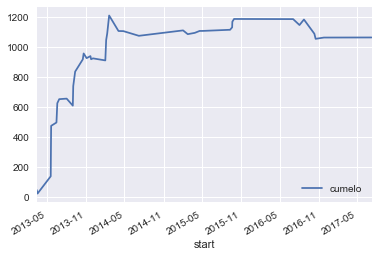

In [38]:
df2[df2['player'] == 'Era'].sort_values('start')[['cumelo', 'start']].set_index('start').plot()

In [39]:
df[df['tour'] == 'DreamLeague Season 8'].sort_values('team')

,country,name,dob,team,player,tour,start,end,startelo32,startelo64,endelo32,endelo64,ageattour,elo32diff
408,Canada,Artour Babaev,1996-07-01,Evil Geniuses,Arteezy,DreamLeague Season 8,2017-12-01,2017-12-03,1140.686839,1217.171015,1175.542478,1271.058372,7823,34.855639
905,Denmark,Andreas Franck,1996-07-13,Evil Geniuses,Cr1t-,DreamLeague Season 8,2017-12-01,2017-12-03,1140.686839,1217.171015,1175.542478,1271.058372,7811,34.855639
4828,USA,Saahil Arora,1989-10-11,Evil Geniuses,UNiVeRsE,DreamLeague Season 8,2017-12-01,2017-12-03,1140.686839,1217.171015,1175.542478,1271.058372,10278,34.855639
1422,USA,Clinton Loomis,1988-02-19,Evil Geniuses,Fear,DreamLeague Season 8,2017-12-01,2017-12-03,1140.686839,1217.171015,1175.542478,1271.058372,10878,34.855639
58,Philippines,Abed Azel,2000-08-02,Fnatic,Abed,DreamLeague Season 8,2017-12-01,2017-12-03,1115.343376,1158.587209,1113.766947,1156.419756,6330,-1.576429
3570,Malaysia,Khoo Chong,1993-03-31,Fnatic,Ohaiyo,DreamLeague Season 8,2017-12-01,2017-12-03,1115.343376,1158.587209,1113.766947,1156.419756,9011,-1.576429
1088,Philippines,Djardel Jicko,1994-11-06,Fnatic,DJ,DreamLeague Season 8,2017-12-01,2017-12-03,1115.343376,1158.587209,1113.766947,1156.419756,8426,-1.576429
1276,Canada,Jacky Mao,1991-07-02,Fnatic,EternaLEnVy,DreamLeague Season 8,2017-12-01,2017-12-03,1115.343376,1158.587209,1113.766947,1156.419756,9649,-1.576429
2655,Peru,Alonso León,1997-01-31,Infamous,Kotar? Hayama,DreamLeague Season 8,2017-12-01,2017-12-03,1057.849960,1087.736027,1057.059310,1086.536916,7609,-0.790651
3667,Argentina,Mariano Caneda,1995-01-19,Infamous,Papita,DreamLeague Season 8,2017-12-01,2017-12-03,1057.849960,1087.736027,1057.059310,1086.536916,8352,-0.790651


In [40]:
df[df['player'] == 'Abed'].sort_values('start')

,country,name,dob,team,player,tour,start,end,startelo32,startelo64,endelo32,endelo64,ageattour,elo32diff
68,Philippines,Abed Azel,2000-08-02,Execration,Abed,World Cyber Arena 2016 SEA Qualifiers,2016-04-29,2016-05-21,993.416956,1021.289306,1113.113969,1210.223550,5749,119.697013
63,Philippines,Abed Azel,2000-08-02,Execration,Abed,The International 2016,2016-08-02,2016-08-13,1098.532625,1146.553589,1055.689803,1060.835578,5844,-42.842822
67,Philippines,Abed Azel,2000-08-02,Execration,Abed,MPGL Southeast Asian Championship,2016-09-09,2016-09-11,1097.419652,1182.188764,1163.935225,1299.018689,5882,66.515572
66,Philippines,Abed Azel,2000-08-02,Execration,Abed,Shanghai Dota 2 Open #2,2016-09-20,2016-10-08,1154.091183,1281.063108,1084.038554,1101.332566,5893,-70.052630
65,Philippines,Abed Azel,2000-08-02,Execration,Abed,ROG MASTERS 2016,2016-11-10,2016-11-13,1074.370686,1107.509545,1075.145306,1095.999702,5944,0.774620
62,Philippines,Abed Azel,2000-08-02,Digital Chaos,Abed,The Kiev Major 2017,2017-04-24,2017-04-30,1090.795372,1154.669323,1065.839371,1091.342616,6109,-24.956000
61,Philippines,Abed Azel,2000-08-02,Digital Chaos,Abed,ZOTAC Cup Masters,2017-05-30,2017-06-03,1106.891559,1167.219806,1104.025603,1143.463668,6145,-2.865956
60,Philippines,Abed Azel,2000-08-02,Digital Chaos,Abed,DOTA Summit 7,2017-06-14,2017-06-18,1096.442665,1133.005894,1100.772361,1141.094198,6160,4.329696
59,Philippines,Abed Azel,2000-08-02,Digital Chaos,Abed,The International 2017,2017-08-02,2017-08-12,1106.987821,1192.740422,1052.363348,1074.404147,6209,-54.624473
58,Philippines,Abed Azel,2000-08-02,Fnatic,Abed,DreamLeague Season 8,2017-12-01,2017-12-03,1115.343376,1158.587209,1113.766947,1156.419756,6330,-1.576429


In [41]:
##startdoing normalized

dfnormal = df2.drop(['startelo32', 'startelo64', 'endelo32', 'endelo64'], axis=1)

In [42]:
dfstat = df2[['player', 'cumelo']].groupby(['player']).mean()
dfstd = df2[['player', 'cumelo']].groupby(['player']).std()

In [43]:
dfstat['std'] = df2[['player', 'cumelo']].groupby(['player']).std()

In [44]:
dfstat['mean'] = df2[['player', 'cumelo']].groupby(['player']).mean()

In [45]:
dfstat = dfstat.reset_index()
dfstat = dfstat.drop('cumelo', axis=1)
dfstat.head()

,player,std,mean
0,33,17.584630,2.123740
1,7ckngMad,122.207669,-26.991363
2,9pasha,57.843327,-79.308143
3,???,21.677905,12.133504
4,ALOHADANCE,79.313722,247.878133


In [46]:
dfnormal.head()

,player,start,country,name,dob,team,tour,end,ageattour,elo32diff,cumelo,intage
0,33,2016-12-14,Israel,Neta Shapira,1997-04-17,Prodota Gaming,World Cyber Arena 2016,2016-12-16,7181,-10.310471,-10.310471,19
1,33,2017-05-02,Israel,Neta Shapira,1997-04-17,Prodota Gaming,Mr. Cat Invitational Europe,2017-05-18,7320,24.868422,14.557951,20
2,BzzIsPerfect,2014-10-31,Russia,Stanislav Glushan,1992-11-09,Virtus.pro,XMG Captains Draft 2.0,2014-12-21,8026,1.329072,121.803080,21
3,BzzIsPerfect,2014-10-06,Russia,Stanislav Glushan,1992-11-09,Virtus.pro,ASUS ROG DreamLeague Season 2,2014-11-29,8001,70.655578,120.474008,21
4,BzzIsPerfect,2014-08-15,Russia,Stanislav Glushan,1992-11-09,Virtus.Pro,StarLadder StarSeries Season 10,2014-10-26,7949,50.786906,50.786906,21


In [47]:
dfnormal = dfnormal.merge(dfstat, left_on='player', right_on='player', how='outer')

In [48]:
dfnormal['normal'] = (dfnormal['cumelo'] - dfnormal['mean']) / dfnormal['std']

In [49]:
dfnormal.head()

,player,start,country,name,dob,team,tour,end,ageattour,elo32diff,cumelo,intage,std,mean,normal
0,33,2016-12-14,Israel,Neta Shapira,1997-04-17,Prodota Gaming,World Cyber Arena 2016,2016-12-16,7181,-10.310471,-10.310471,19,17.584630,2.123740,-0.707107
1,33,2017-05-02,Israel,Neta Shapira,1997-04-17,Prodota Gaming,Mr. Cat Invitational Europe,2017-05-18,7320,24.868422,14.557951,20,17.584630,2.123740,0.707107
2,BzzIsPerfect,2014-10-31,Russia,Stanislav Glushan,1992-11-09,Virtus.pro,XMG Captains Draft 2.0,2014-12-21,8026,1.329072,121.803080,21,35.513512,84.585602,1.047981
3,BzzIsPerfect,2014-10-06,Russia,Stanislav Glushan,1992-11-09,Virtus.pro,ASUS ROG DreamLeague Season 2,2014-11-29,8001,70.655578,120.474008,21,35.513512,84.585602,1.010556
4,BzzIsPerfect,2014-08-15,Russia,Stanislav Glushan,1992-11-09,Virtus.Pro,StarLadder StarSeries Season 10,2014-10-26,7949,50.786906,50.786906,21,35.513512,84.585602,-0.951714


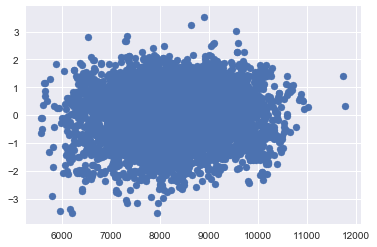

In [50]:
#start analysis
Y = dfnormal['normal']
X = dfnormal['ageattour']
plt.scatter(X, Y)

In [51]:
df = dfnormal

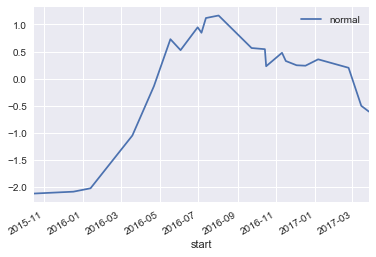

In [52]:
df[df['player'] == 'Iceice'].sort_values('start')[['normal', 'start']].set_index('start').plot()

In [53]:
df[['normal', 'player', 'start']].sort_values('normal', ascending=False)

,normal,player,start
5038,3.532420,Luo,2015-03-09
872,3.240704,ChuaN,2015-03-09
1510,3.031870,Fenrir,2015-03-09
1853,2.838886,Fy,2015-03-09
4524,2.794244,SoNNeikO,2015-03-28
4390,2.673274,Silent,2012-11-13
4391,2.643940,Silent,2012-11-22
3370,2.598996,Mu,2016-03-19
4616,2.588140,Super,2017-12-08
4617,2.549672,Super,2017-11-19


In [54]:
df = df[df['normal'].notnull()]
df.head()

,player,start,country,name,dob,team,tour,end,ageattour,elo32diff,cumelo,intage,std,mean,normal
0,33,2016-12-14,Israel,Neta Shapira,1997-04-17,Prodota Gaming,World Cyber Arena 2016,2016-12-16,7181,-10.310471,-10.310471,19,17.584630,2.123740,-0.707107
1,33,2017-05-02,Israel,Neta Shapira,1997-04-17,Prodota Gaming,Mr. Cat Invitational Europe,2017-05-18,7320,24.868422,14.557951,20,17.584630,2.123740,0.707107
2,BzzIsPerfect,2014-10-31,Russia,Stanislav Glushan,1992-11-09,Virtus.pro,XMG Captains Draft 2.0,2014-12-21,8026,1.329072,121.803080,21,35.513512,84.585602,1.047981
3,BzzIsPerfect,2014-10-06,Russia,Stanislav Glushan,1992-11-09,Virtus.pro,ASUS ROG DreamLeague Season 2,2014-11-29,8001,70.655578,120.474008,21,35.513512,84.585602,1.010556
4,BzzIsPerfect,2014-08-15,Russia,Stanislav Glushan,1992-11-09,Virtus.Pro,StarLadder StarSeries Season 10,2014-10-26,7949,50.786906,50.786906,21,35.513512,84.585602,-0.951714


In [55]:
df['quarterattour'] = df['ageattour'] // 365

C:\Users\thasarito\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [56]:
df.head()

,player,start,country,name,dob,team,tour,end,ageattour,elo32diff,cumelo,intage,std,mean,normal,quarterattour
0,33,2016-12-14,Israel,Neta Shapira,1997-04-17,Prodota Gaming,World Cyber Arena 2016,2016-12-16,7181,-10.310471,-10.310471,19,17.584630,2.123740,-0.707107,19
1,33,2017-05-02,Israel,Neta Shapira,1997-04-17,Prodota Gaming,Mr. Cat Invitational Europe,2017-05-18,7320,24.868422,14.557951,20,17.584630,2.123740,0.707107,20
2,BzzIsPerfect,2014-10-31,Russia,Stanislav Glushan,1992-11-09,Virtus.pro,XMG Captains Draft 2.0,2014-12-21,8026,1.329072,121.803080,21,35.513512,84.585602,1.047981,21
3,BzzIsPerfect,2014-10-06,Russia,Stanislav Glushan,1992-11-09,Virtus.pro,ASUS ROG DreamLeague Season 2,2014-11-29,8001,70.655578,120.474008,21,35.513512,84.585602,1.010556,21
4,BzzIsPerfect,2014-08-15,Russia,Stanislav Glushan,1992-11-09,Virtus.Pro,StarLadder StarSeries Season 10,2014-10-26,7949,50.786906,50.786906,21,35.513512,84.585602,-0.951714,21


In [128]:
plot = df[['ageattour', 'normal']].groupby('ageattour').mean().reset_index()
plot.head()

,ageattour,normal
0,5569,-0.632302
1,5573,-0.089774
2,5583,-0.100119
3,5600,-0.483802
4,5614,0.378544


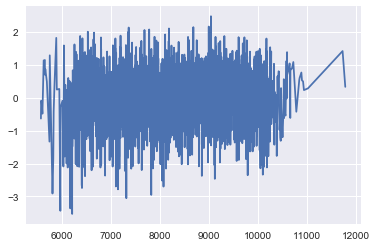

In [129]:
x = plot['ageattour']
y = plot['normal']
plt.plot(x, y)
plt.show()

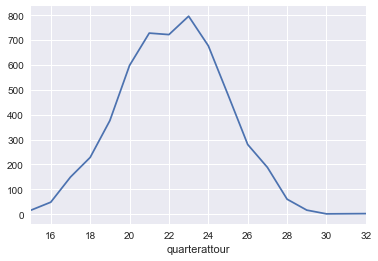

In [59]:
df[['quarterattour', 'normal']].groupby('quarterattour').size().plot()

In [60]:
df.head()

,player,start,country,name,dob,team,tour,end,ageattour,elo32diff,cumelo,intage,std,mean,normal,quarterattour
0,33,2016-12-14,Israel,Neta Shapira,1997-04-17,Prodota Gaming,World Cyber Arena 2016,2016-12-16,7181,-10.310471,-10.310471,19,17.584630,2.123740,-0.707107,19
1,33,2017-05-02,Israel,Neta Shapira,1997-04-17,Prodota Gaming,Mr. Cat Invitational Europe,2017-05-18,7320,24.868422,14.557951,20,17.584630,2.123740,0.707107,20
2,BzzIsPerfect,2014-10-31,Russia,Stanislav Glushan,1992-11-09,Virtus.pro,XMG Captains Draft 2.0,2014-12-21,8026,1.329072,121.803080,21,35.513512,84.585602,1.047981,21
3,BzzIsPerfect,2014-10-06,Russia,Stanislav Glushan,1992-11-09,Virtus.pro,ASUS ROG DreamLeague Season 2,2014-11-29,8001,70.655578,120.474008,21,35.513512,84.585602,1.010556,21
4,BzzIsPerfect,2014-08-15,Russia,Stanislav Glushan,1992-11-09,Virtus.Pro,StarLadder StarSeries Season 10,2014-10-26,7949,50.786906,50.786906,21,35.513512,84.585602,-0.951714,21


In [61]:
df['intage2'] = df['intage'] * df['intage']

C:\Users\thasarito\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [62]:
#Regression
Y = df['normal']
X = df[['intage', 'intage2']]

In [63]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [64]:
regr = LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [65]:
coef = regr.coef_

In [66]:
regr.coef_

array([ 0.10946237, -0.00199664])

In [67]:
X2 = sm.add_constant(X)
model = sm.OLS(Y, X2)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 normal   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     9.415
Date:                Thu, 18 Jan 2018   Prob (F-statistic):           8.29e-05
Time:                        15:21:19   Log-Likelihood:                -7467.3
No. Observations:                5365   AIC:                         1.494e+04
Df Residuals:                    5362   BIC:                         1.496e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4324      0.734     -1.951      0.0

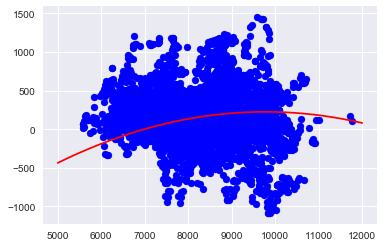

In [127]:
# create 1000 equally spaced points between -10 and 10
c = np.linspace(5000, 12000, 10000)

# calculate the y value for each element of the x vector
d = (-0.000029 * (c**2)) + (0.5667928)*c - 2545

fig, ax = plt.subplots()
ax.plot(c, d, 'r')
plt.scatter(data['ageattour'], data['cumelo'], color='b', marker='o')

In [69]:
df[['intage', 'normal']].groupby('intage').mean()

,normal
intage,
15,-0.185023
16,-0.601500
17,-0.048620
18,-0.073301
19,-0.038499
20,0.030714
21,-0.067674
22,-0.093367
23,-0.023712


In [70]:
##Paneldata

In [71]:
df

,player,start,country,name,dob,team,tour,end,ageattour,elo32diff,cumelo,intage,std,mean,normal,quarterattour,intage2
0,33,2016-12-14,Israel,Neta Shapira,1997-04-17,Prodota Gaming,World Cyber Arena 2016,2016-12-16,7181,-10.310471,-10.310471,19,17.584630,2.123740,-0.707107,19,361
1,33,2017-05-02,Israel,Neta Shapira,1997-04-17,Prodota Gaming,Mr. Cat Invitational Europe,2017-05-18,7320,24.868422,14.557951,20,17.584630,2.123740,0.707107,20,400
2,BzzIsPerfect,2014-10-31,Russia,Stanislav Glushan,1992-11-09,Virtus.pro,XMG Captains Draft 2.0,2014-12-21,8026,1.329072,121.803080,21,35.513512,84.585602,1.047981,21,441
3,BzzIsPerfect,2014-10-06,Russia,Stanislav Glushan,1992-11-09,Virtus.pro,ASUS ROG DreamLeague Season 2,2014-11-29,8001,70.655578,120.474008,21,35.513512,84.585602,1.010556,21,441
4,BzzIsPerfect,2014-08-15,Russia,Stanislav Glushan,1992-11-09,Virtus.Pro,StarLadder StarSeries Season 10,2014-10-26,7949,50.786906,50.786906,21,35.513512,84.585602,-0.951714,21,441
5,BzzIsPerfect,2014-11-01,Russia,Stanislav Glushan,1992-11-09,Virtus.pro,MSI Beat IT 2014,2014-11-02,8027,-41.757494,80.045586,21,35.513512,84.585602,-0.127839,21,441
6,BzzIsPerfect,2014-08-25,Russia,Stanislav Glushan,1992-11-09,Virtus.Pro,Megafon Battle Arena,2014-08-26,7959,-0.968476,49.818430,21,35.513512,84.585602,-0.978984,21,441
7,7ckngMad,2015-01-21,France,Sébastien Debs,1992-05-11,Alliance,Dota Pit League Season 3,2015-07-12,8290,-57.046261,9.410345,22,122.207669,-26.991363,0.297868,22,484
8,7ckngMad,2015-06-20,France,Sébastien Debs,1992-05-11,Alliance,ESL One Frankfurt 2015,2015-06-21,8440,-0.007901,-227.315043,23,122.207669,-26.991363,-1.639207,23,529
9,7ckngMad,2015-03-28,France,Sébastien Debs,1992-05-11,Alliance,ASUS ROG DreamLeague Season 3,2015-06-15,8356,-179.454467,-79.532516,22,122.207669,-26.991363,-0.429933,22,484


In [76]:
df.dtypes

player                   object
start            datetime64[ns]
country                  object
name                     object
dob              datetime64[ns]
team                     object
tour                     object
end              datetime64[ns]
ageattour                 int32
elo32diff               float64
cumelo                  float64
intage                    int32
std                     float64
mean                    float64
normal                  float64
quarterattour             int32
intage2                   int32
dtype: object

In [77]:
df.to_csv('tostata.csv')

In [80]:
df.groupby('player')

,start,country,name,dob,team,tour,end,ageattour,elo32diff,cumelo,intage,std,mean,normal,quarterattour,intage2
player,,,,,,,,,,,,,,,,
33,2016-12-14,Israel,Neta Shapira,1997-04-17,Prodota Gaming,Mr. Cat Invitational Europe,2016-12-16,7181,-10.310471,-10.310471,19,17.584630,2.123740,-0.707107,19,361
7ckngMad,2013-08-31,France,Sébastien Debs,1992-05-11,Alliance,ASUS ROG DreamLeague Season 1,2013-10-13,7782,-179.454467,-227.315043,21,122.207669,-26.991363,-1.639207,21,441
9pasha,2016-11-16,Russia,Pavel Khvastunov,1992-06-30,Virtus.Pro,AMD SAPPHIRE Dota PIT League,2016-11-20,8905,-77.406616,-167.314446,24,57.843327,-79.308143,-1.521460,24,576
???,2016-05-18,China,Wang Liang,1994-11-30,Brave Heart,Dota2 ACE - Provisional,2016-07-17,7840,-40.572048,-19.111602,21,21.677905,12.133504,-1.441334,21,441
ALOHADANCE,2014-11-14,Ukraine,Ilya Korobkin,1997-09-15,Team Empire,ASUS ROG DreamLeague Season 3,2014-12-14,6269,-155.571969,81.408541,17,79.313722,247.878133,-2.098875,17,289
ALWAYSWANNAFLY,2013-08-31,Ukraine,Andrey Bondarenko,1991-03-06,Fantastic Five,ASUS ROG DreamLeague Season 1,2013-10-13,8214,-155.571969,102.591735,22,122.000435,329.706011,-1.861586,22,484
ARS-ART,2012-09-17,Russia,Sergey Revin,1988-08-12,Natus Vincere,ASUS ROG DreamLeague Kick-Off Season,2012-10-21,8802,-119.922677,-265.308045,24,114.555217,-42.937850,-1.941162,24,576
Abed,2016-04-29,Philippines,Abed Azel,2000-08-02,Digital Chaos,DOTA Summit 7,2016-05-21,5749,-70.052630,-5.601408,15,44.631437,62.181094,-1.518717,15,225
Accel,2015-11-13,Peru,Christian Cruz,1995-10-20,Infamous,DreamLeague Season 8,2015-11-21,7329,-74.928178,-74.113995,20,39.814425,-27.344608,-1.174684,20,400


In [98]:
dfid = pd.DataFrame(df.player.unique()).reset_index().rename(columns={'index': 'id', 0: 'player'})
dfid.head()

,id,player
0,0,33
1,1,BzzIsPerfect
2,2,7ckngMad
3,3,9pasha
4,4,Dogf1ghts


In [99]:
dfid = dfid.merge(df, left_on='player', right_on='player', how='outer')

In [113]:
dfid.to_csv('tostata.csv')

In [114]:
len(dfid)

5311

In [118]:
data = dfid
data['ageattoursq'] = data['ageattour'] * data['ageattour']

In [119]:
data = data.set_index(['player', 'start'])

In [122]:
Y = data['normal']
X = data[['ageattour', 'ageattoursq']]
mod = PanelOLS(Y, X)
res = mod.fit()

In [124]:
res.summary

Dep. Variable:,normal,R-squared:,0.0025
Estimator:,PanelOLS,R-squared (Between):,-7.9157
No. Observations:,5311,R-squared (Within):,0.0048
Date:,"Thu, Jan 18 2018",R-squared (Overall):,0.0025
Time:,15:41:33,Log-likelihood,-7395.9
Cov. Estimator:,Unadjusted,,
,,F-statistic:,6.6193
Entities:,265,P-value,0.0013
Avg Obs:,20.042,Distribution:,"F(2,5309)"
Min Obs:,2.0000,,
Max Obs:,77.000,F-statistic (robust):,6.6193


In [131]:
df.head()

,player,start,country,name,dob,team,tour,end,ageattour,elo32diff,cumelo,intage,std,mean,normal,quarterattour,intage2
0,33,2016-12-14,Israel,Neta Shapira,1997-04-17,Prodota Gaming,World Cyber Arena 2016,2016-12-16,7181,-10.310471,-10.310471,19,17.584630,2.123740,-0.707107,19,361
1,33,2017-05-02,Israel,Neta Shapira,1997-04-17,Prodota Gaming,Mr. Cat Invitational Europe,2017-05-18,7320,24.868422,14.557951,20,17.584630,2.123740,0.707107,20,400
2,BzzIsPerfect,2014-10-31,Russia,Stanislav Glushan,1992-11-09,Virtus.pro,XMG Captains Draft 2.0,2014-12-21,8026,1.329072,121.803080,21,35.513512,84.585602,1.047981,21,441
3,BzzIsPerfect,2014-10-06,Russia,Stanislav Glushan,1992-11-09,Virtus.pro,ASUS ROG DreamLeague Season 2,2014-11-29,8001,70.655578,120.474008,21,35.513512,84.585602,1.010556,21,441
4,BzzIsPerfect,2014-08-15,Russia,Stanislav Glushan,1992-11-09,Virtus.Pro,StarLadder StarSeries Season 10,2014-10-26,7949,50.786906,50.786906,21,35.513512,84.585602,-0.951714,21,441


In [141]:
df.sort_values('start').groupby(['player', 'start']).set_index()

AttributeError: Cannot access callable attribute 'set_index' of 'DataFrameGroupBy' objects, try using the 'apply' method